In [ ]:
# import libraries
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


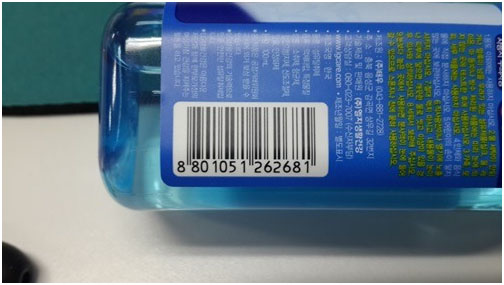

In [ ]:
image = cv2.imread("/content/barcode.jpg")
cv2_imshow(image)

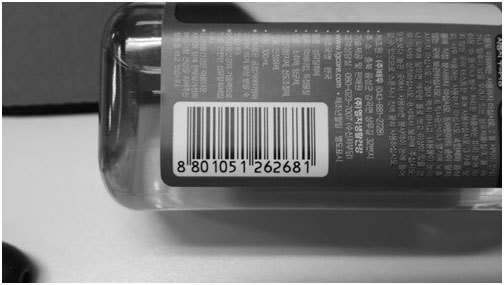

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)


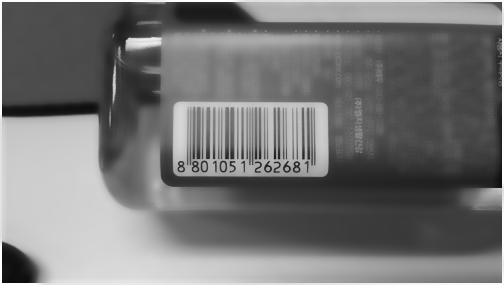

In [ ]:
blurred = cv2.bilateralFilter(gray, 13, 50, 50)
cv2_imshow(blurred)

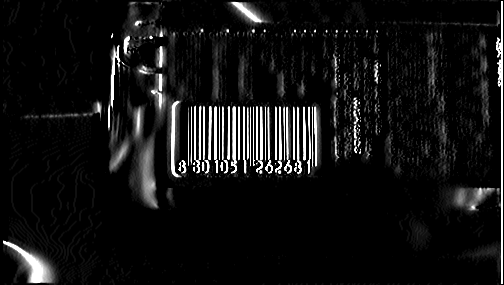

In [ ]:
gradX = cv2.Sobel(blurred, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = -1)
cv2_imshow(gradX)

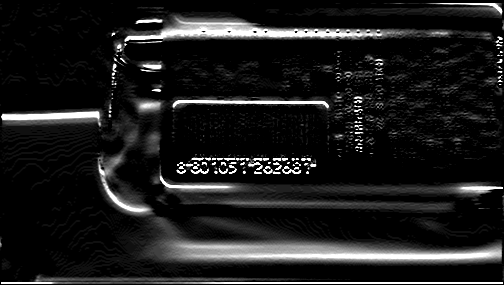

In [ ]:
gradY = cv2.Sobel(blurred, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = -1)
cv2_imshow(gradY)

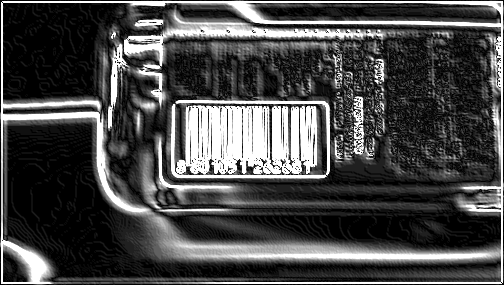

In [ ]:
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)

cv2_imshow(gradient)

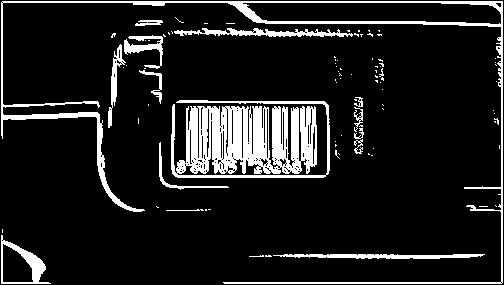

In [ ]:
(_, thresh) = cv2.threshold(gradient, 250, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)


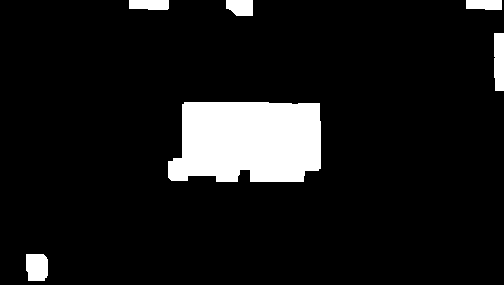

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
closed = cv2.erode(closed, None, iterations = 4)
closed = cv2.dilate(closed, None, iterations = 8)
cv2_imshow(closed)

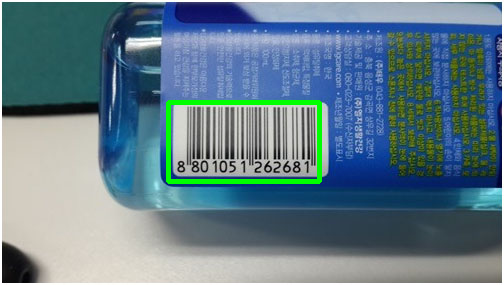

In [ ]:
cnts,hierarchy = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[-2:]
# c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
c = max(cnts, key=cv2.contourArea)
rect = cv2.minAreaRect(c)
box = np.int0(cv2.boxPoints(rect))
cv2.drawContours(image, [box], -1, (0, 255, 0), 3)
cv2_imshow(image)